In [18]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load data into a Pandas DataFrame
df = pd.read_csv('datos_rellenados_01.csv') 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()
print(df.shape)

(1353, 18)


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   estado_vital                 1353 non-null   float64
 1   edad                         1353 non-null   float64
 2   peso                         1353 non-null   float64
 3   hipertension_arterial        1353 non-null   float64
 4   diabetes_mellitus            1353 non-null   float64
 5   tabaquismo                   1353 non-null   float64
 6   frecuencia_cardiaca          1353 non-null   float64
 7   presion_arterial_sistolica   1353 non-null   float64
 8   presion_arterial_diastolica  1353 non-null   float64
 9   hb                           1353 non-null   float64
 10  creatinina                   1353 non-null   float64
 11  ckmb                         1353 non-null   float64
 12  fibrilacion_auricular        1353 non-null   float64
 13  insuficiencia_rena

,estado_vital,edad,peso,hipertension_arterial,diabetes_mellitus,tabaquismo,frecuencia_cardiaca,presion_arterial_sistolica,presion_arterial_diastolica,hb,creatinina,ckmb,fibrilacion_auricular,insuficiencia_renal_cronica,ieca,furosemida,otros_diureticos,clopidogrel
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.101996,66.220990,73.026608,0.849224,0.294900,0.478197,84.853659,125.937177,74.700665,127.637103,103.455285,154.460584,0.015521,0.032520,0.872136,0.182557,0.515152,0.961567
std,0.302754,12.655743,11.982885,0.357963,0.456167,0.499709,14.946676,22.987900,14.060935,25.702221,59.439608,92.668129,0.123659,0.177443,0.334062,0.386446,0.499955,0.192311
min,0.000000,13.000000,40.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,8.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.000000,65.000000,1.000000,0.000000,0.000000,78.000000,120.000000,70.000000,127.000000,78.000000,95.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,67.000000,72.000000,1.000000,0.000000,0.000000,86.000000,130.000000,70.000000,133.000000,89.000000,171.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,0.000000,75.000000,80.000000,1.000000,1.000000,1.000000,88.000000,130.000000,80.000000,135.000000,113.000000,184.700000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,98.000000,150.000000,1.000000,1.000000,1.000000,180.000000,240.000000,130.000000,238.000000,1036.000000,960.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From an initial statistical overview of the dataset, we infer that some data features are binary or ordinal, whereas other features are continuous. Further, the minimum and maximum values for some features, notably for systolic and diastolic blood pressure, are unrealistic. This suggests the presence of outliers in the data.

In [14]:
# check distribution of target variable
df.estado_vital.value_counts()

0.0    1215
1.0     138
Name: estado_vital, dtype: int64

1215 out of 1353 cases in this dataset are labelled alive, and 138 cases are labelled dead. This suggests that the dataset is not balanced. We will need to take this into account when we split the dataset into training and test sets.

<Axes: >

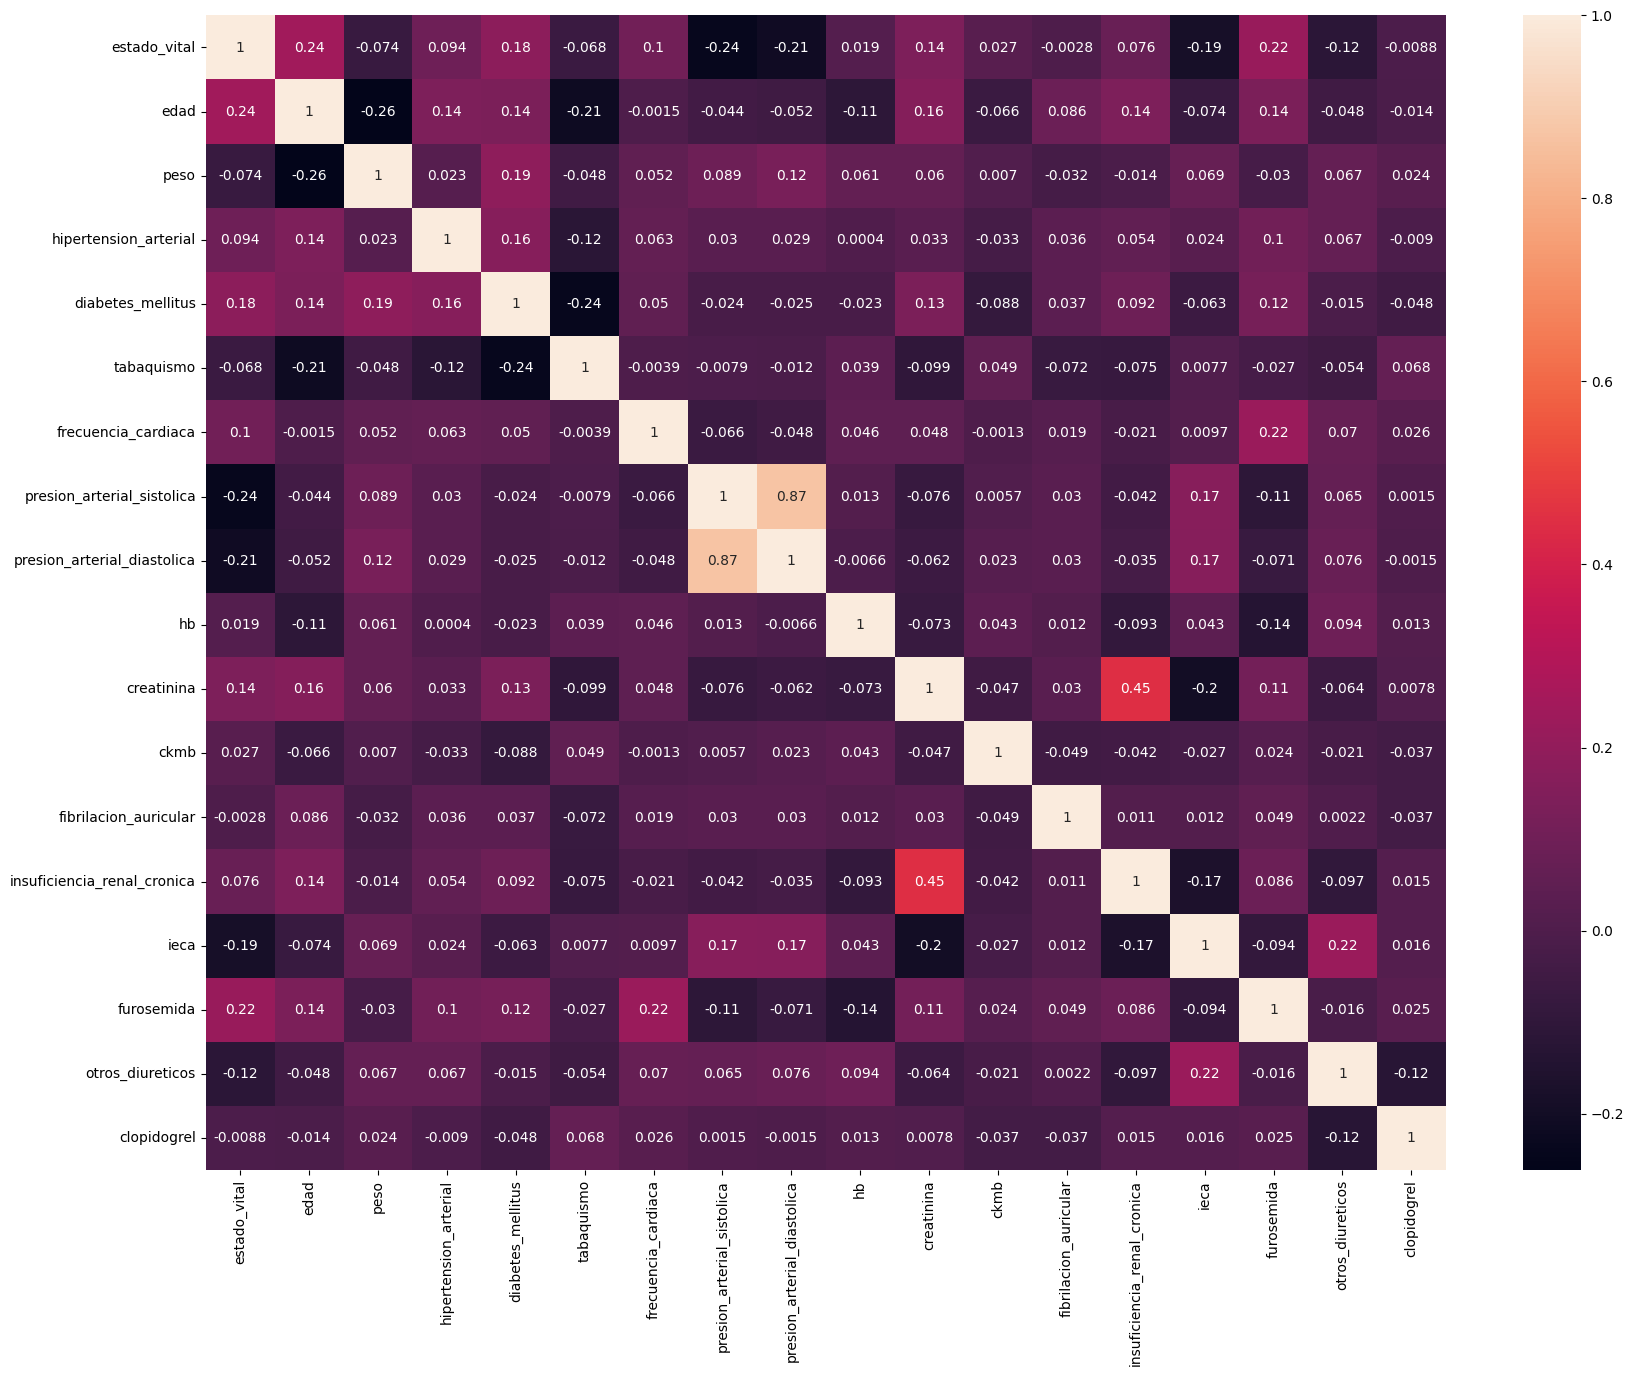

In [19]:
# check correlations
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

A heatmap shows correlations between variables in the dataset. From the above heatmap, we see that no features directly correlate with the label (estado_vital) and that generally, there do not exist significant correlations between other variables. However, correlations exist between two variables:
- Creatinina and insufuciencia_renal_crónica are correlated with a score of 0.45.

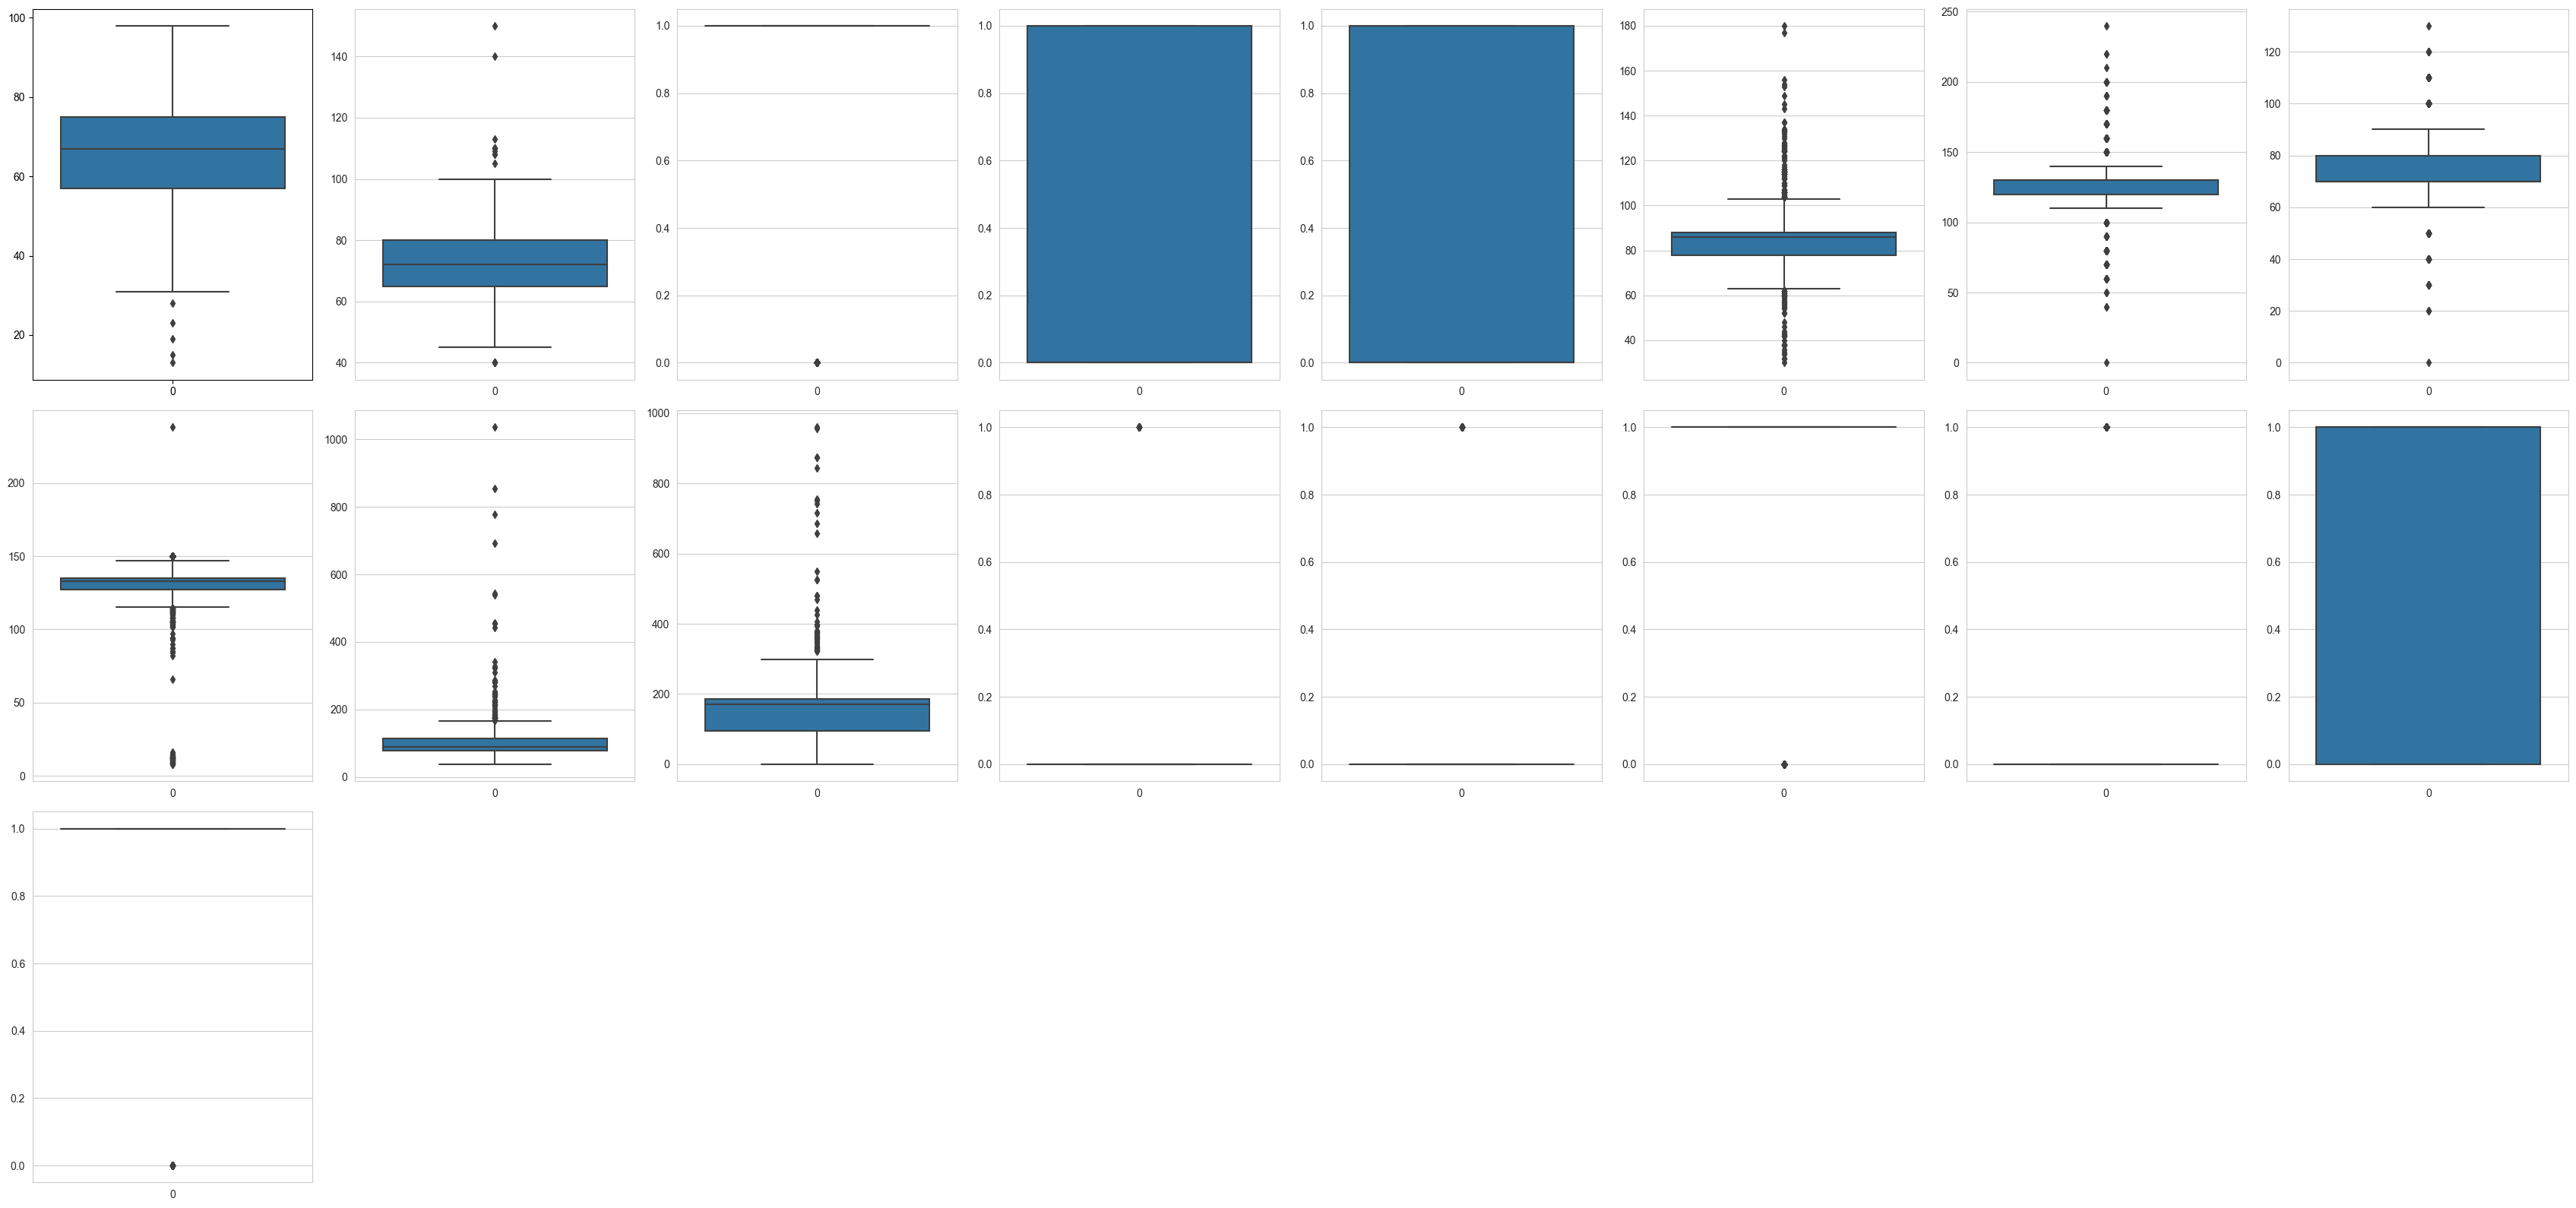

In [20]:
# check outliers

def check_outliers(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,int(number_of_columns),i)
        sns.set_style('whitegrid')
        sns.boxplot(df[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(df)

The above boxplots confirm our suspicion that there are outliers in the dataset. There appear to be several outliers in the systolic and diastolic variables. These outliers might be explained by human error when entering data into the .csv format. Our prediction model might benefit if these outliers were removed from the data.

In [ ]:
# check distribution and skew
def check_dist(df):
    l = df.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows+1,int(number_of_columns),i)
        sns.distplot(df[l[i]],kde=True) 
        plt.tight_layout()
        
check_dist(df)

In [10]:
# normalize continuous variables
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df[cont_cols])
df_normalized = pd.DataFrame(df_scaled)
df_normalized.columns = cont_cols
cols = ['gender', 'smoke', 'alco', 'active', 'cardio', 'cholesterol_1', 
        'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2', 'bmi', 'bp']
df_normalized = pd.concat([df_normalized, cleaned_df[cols]], axis=1)
df_normalized.head(10)

NameError: name 'cleaned_df' is not defined